<a href="https://colab.research.google.com/github/Pouyaaskari/DETECTRON2-TUTORIAL-for-Colab./blob/master/DETECTRON2_TUTORIAL_for_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing libraries

In [2]:
!pip install pyyaml==5.1

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=f2b46355984efac438c8341bfdbc40567b81d41f59e71dc5ae7ab211f8b79c2a
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:

!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 76 kB/s 
     |████████████████████████████████| 7.6 MB 5.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.1+cu101 which is incompatible.


In [6]:
import torch 
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [7]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 829 kB/s 
     |████████████████████████████████| 74 kB 2.3 MB/s 
     |████████████████████████████████| 145 kB 11.2 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 130 kB 27.3 MB/s 
     |████████████████████████████████| 743 kB 42.9 MB/s 
     |████████████████████████████████| 747 kB 39.2 MB/s 
     |████████████████████████████████| 112 kB 47.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210924-py3-none-any.whl size=60829 sha256=5bcf3f7db691a04bd084d6c5955cb245c6e7e1d0ca373ba9982376afec6fa5be
  Stored in directory: /root/.cache/pip/wheels/70/c6/de/aa41c65141bdbc9a8aa4b303ce26482aa2f1720ff41b7f17c3
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=1b6dc6effbdec62d47541be56419609b4bd4cccbf527580949fb690a62d9d5

In [1]:
#import necessary libraries

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog,DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

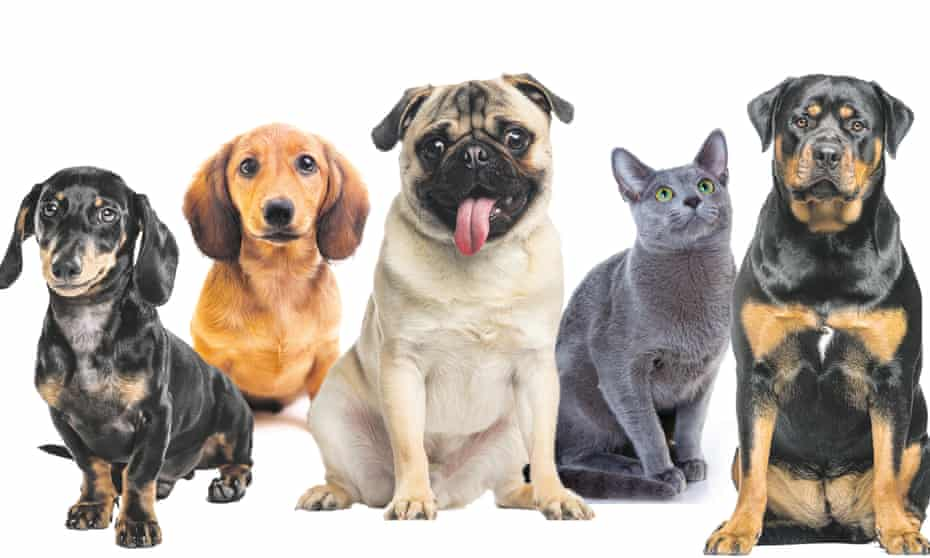

In [3]:
img=cv2.imread("/content/test.jpg")
cv2_imshow(img)

In [4]:
#object detection
cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))

In [5]:
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

In [6]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.6

In [7]:
predictor=DefaultPredictor(cfg)
outputs=predictor(img)

model_final_68b088.pkl: 421MB [00:14, 28.4MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


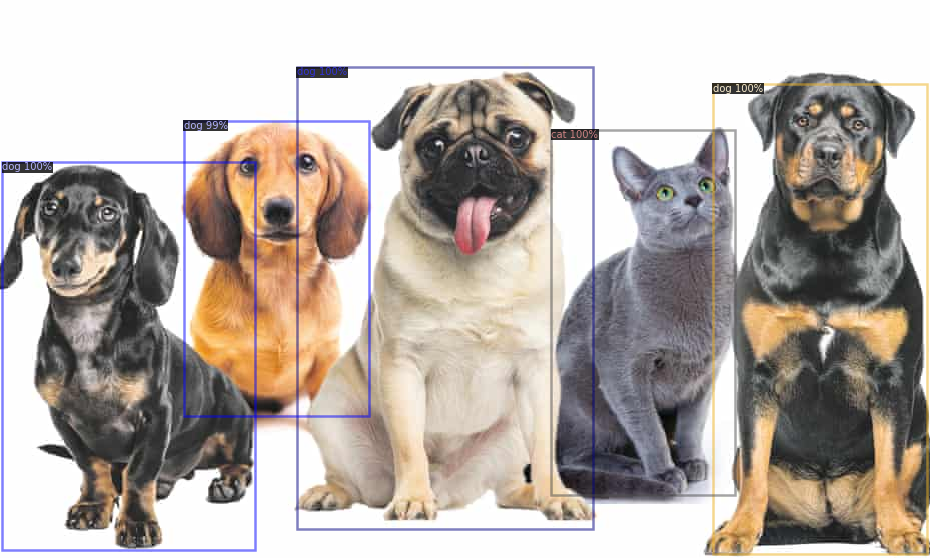

In [9]:
vis=Visualizer(img[:,:,::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))

output=vis.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])

model_final_2d9806.pkl: 431MB [00:14, 30.8MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


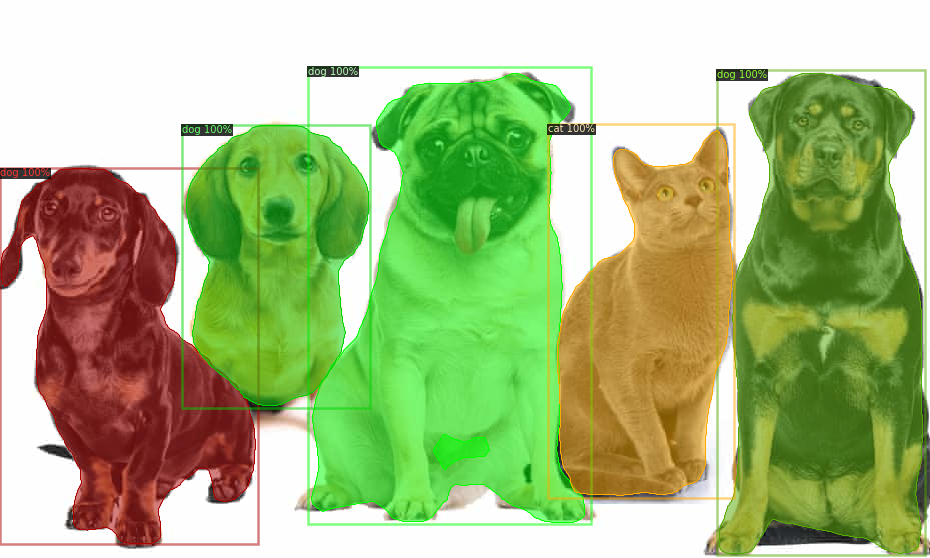

In [10]:
#instance segmentation
cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))

cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.6

predictor=DefaultPredictor(cfg)
outputs=predictor(img)

vis=Visualizer(img[:,:,::-1],MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))

output=vis.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])